In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
import datetime as dt

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('C:/Users/User/Desktop/Critcal/Dataset/Electricity_Demand/elec.csv')


In [58]:
df["DateTime"] = pd.to_datetime(df["Time"], format="%Y-%m-%dT%H:%M:%SZ")

In [59]:
df = df.drop(columns=['Date','Time'])

In [60]:
data = df[['DateTime','Demand','Temperature','Holiday']]
df = df.set_index('DateTime')
df = df.asfreq('30min')
df = df.sort_index()


In [61]:
print ('-'*50,"Data",'-'*50)
print(df.head(5))

-------------------------------------------------- Data --------------------------------------------------
                          Demand  Temperature  Holiday
DateTime                                              
2011-12-31 13:00:00  4382.825174        21.40     True
2011-12-31 13:30:00  4263.365526        21.05     True
2011-12-31 14:00:00  4048.966046        20.70     True
2011-12-31 14:30:00  3877.563330        20.55     True
2011-12-31 15:00:00  4036.229746        20.40     True


In [83]:
print(df)

                          Demand  Temperature  Holiday  Year  Month  Datex  \
DateTime                                                                     
2011-12-31 13:00:00  4382.825174        21.40     True  2011     12     31   
2011-12-31 13:30:00  4263.365526        21.05     True  2011     12     31   
2011-12-31 14:00:00  4048.966046        20.70     True  2011     12     31   
2011-12-31 14:30:00  3877.563330        20.55     True  2011     12     31   
2011-12-31 15:00:00  4036.229746        20.40     True  2011     12     31   
...                          ...          ...      ...   ...    ...    ...   
2014-12-31 10:30:00  3873.448714        19.00    False  2014     12     31   
2014-12-31 11:00:00  3791.637322        18.50    False  2014     12     31   
2014-12-31 11:30:00  3724.835666        17.70    False  2014     12     31   
2014-12-31 12:00:00  3761.886854        17.30    False  2014     12     31   
2014-12-31 12:30:00  3809.414586        17.10    False  2014    

In [62]:
df.describe()

,Demand,Temperature
count,52608.000000,52608.000000
mean,4665.432826,16.265071
std,874.273645,5.658849
min,2857.945728,1.500000
25%,3969.464472,12.300000
50%,4634.706032,15.400000
75%,5244.325424,19.400000
max,9345.004346,43.200000


In [64]:
data[data['Demand'] == df['Demand'].max()]


,DateTime,Demand,Temperature,Holiday
35842,2014-01-16 06:00:00,9345.004346,38.8,False


In [65]:
data[data['Demand'] == df['Demand'].min()]

,DateTime,Demand,Temperature,Holiday
38649,2014-03-15 17:30:00,2857.945728,13.8,False


In [67]:
df['Year'] = pd.DatetimeIndex(df.index).year
df['Month'] = pd.DatetimeIndex(df.index).month
df['Datex'] = pd.DatetimeIndex(df.index).day
df['Hour'] = pd.DatetimeIndex(df.index).hour

Text(0.5, 1.0, 'Demand distribution by Month')

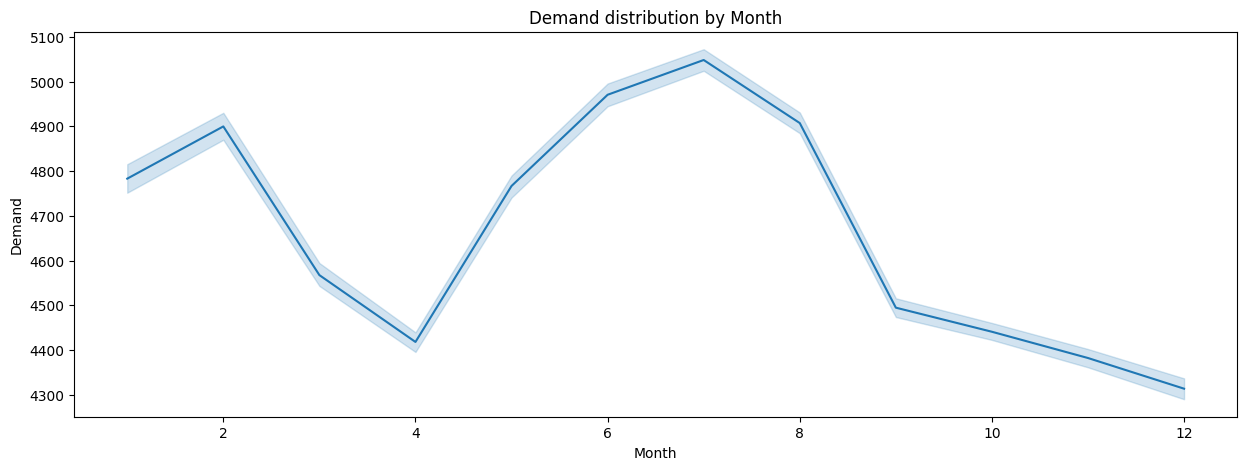

In [68]:

fig = plt.subplots(figsize=(15, 5))
sns.lineplot (x=df.Month, y=df.Demand, data=df).set_title('Demand distribution by Month')

Text(0.5, 1.0, 'Demand distribution by Day of the Days')

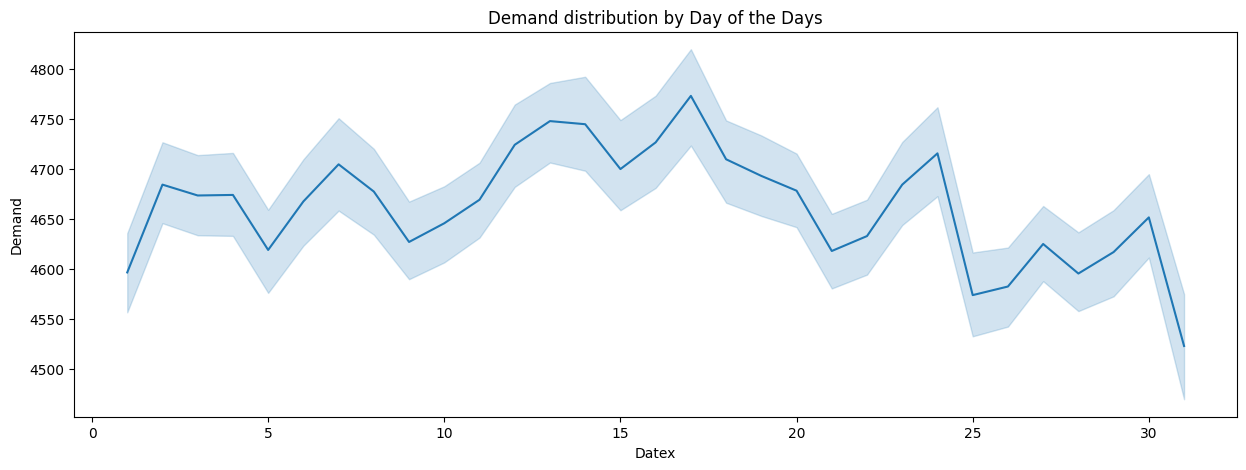

In [73]:
fig = plt.subplots(figsize=(15, 5))
sns.lineplot (x=df.Datex, y=df.Demand, data=df).set_title('Demand distribution by Day of the Days')

Text(0.5, 1.0, 'Demand distribution by Hour')

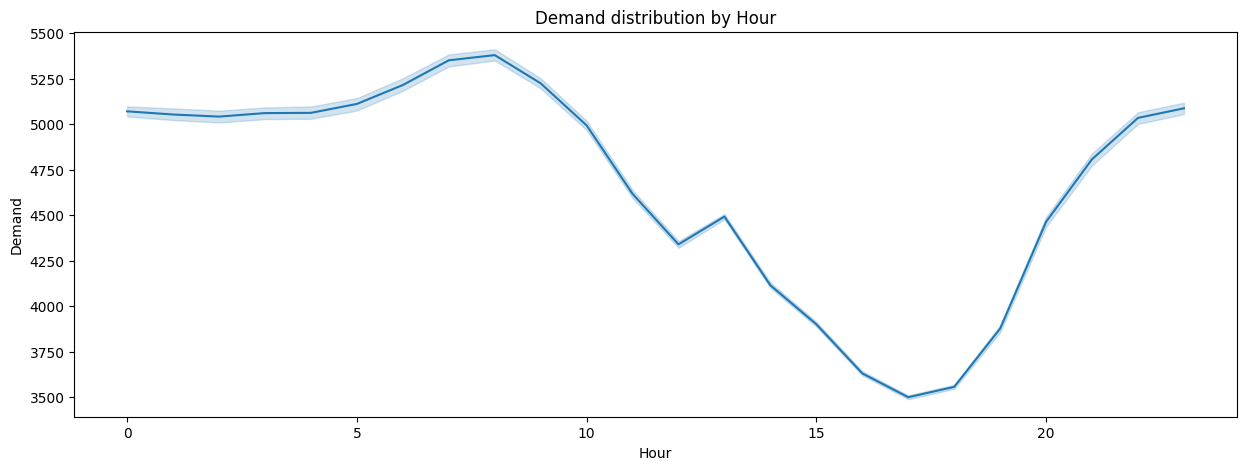

In [71]:
fig = plt.subplots(figsize=(15, 5))
sns.lineplot (x=df.Hour, y=df.Demand, data=df).set_title('Demand distribution by Hour')

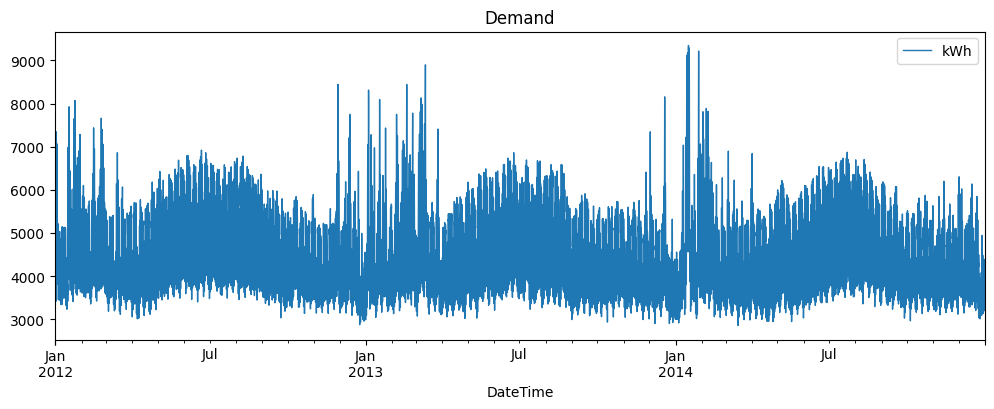

In [75]:
fig, ax = plt.subplots(figsize=(12, 4))
df.Demand.plot(ax=ax, label='kWh', linewidth=1)
ax.set_title('Demand')
ax.legend()

In [84]:
val = '2014-01-01 00:00:00'
test = '2014-12-01 00:00:00'
df_train = df.loc[: val, :]
df_validation   = df.loc[val:test, :]
df_test  = df.loc[test:, :]

print(f"Train dates      : {df_train.index.min()} --- {df_train.index.max()}")
print(f"Validation dates : {df_validation.index.min()} --- {df_validation.index.max()}")
print(f"Test dates       : {df_test.index.min()} --- {df_test.index.max()}")

Train dates      : 2011-12-31 13:00:00 --- 2014-01-01 00:00:00
Validation dates : 2014-01-01 00:00:00 --- 2014-12-01 00:00:00
Test dates       : 2014-12-01 00:00:00 --- 2014-12-31 12:30:00


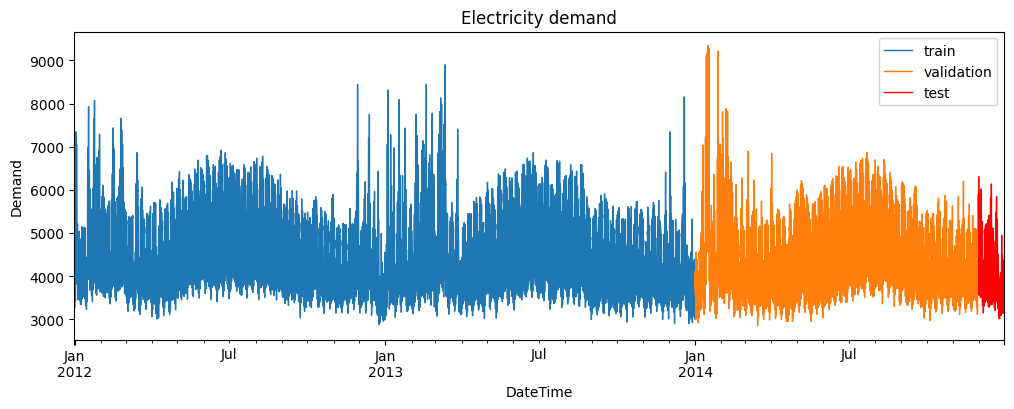

In [134]:
fig, ax = plt.subplots(figsize=(12, 4))
df_train.Demand.plot(ax=ax, label='train', linewidth=1)
df_validation.Demand.plot(ax=ax, label='validation', linewidth=1)
df_test.Demand.plot(ax=ax, label='test', linewidth=1, c='r')
ax.set_title('Electricity demand')
ax.set_ylabel("Demand")

ax.legend()

In [139]:
data = pd.read_csv('C:/Users/User/Desktop/Critcal/Dataset/Electricity_Demand/elec.csv')
data['Time'] = pd.to_datetime(data.Time, format='%Y-%m-%dT%H:%M:%SZ')  # Use 'Time' instead of 'DateTime'
data = data.set_index('Time')
data = data.asfreq('30min')
data = data.sort_index()
d_valid = '2013-12-31 23:59:00'
d_test = '2013-11-30 23:59:00'
data_train = data.loc[: d_valid, :]
data_val   = data.loc[d_valid:d_test, :]
data_test  = data.loc[d_test:, :]


In [142]:
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 24,
                 transformer_y = StandardScaler()
             )

forecaster.fit(y=data.loc[:d_valid, 'Demand'])
forecaster

ForecasterAutoreg 
Regressor: Ridge(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Transformer for y: StandardScaler() 
Transformer for exog: None 
Window size: 24 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2011-12-31 13:00:00'), Timestamp('2013-12-31 23:30:00')] 
Training index type: DatetimeIndex 
Training index frequency: 30T 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': 123, 'solver': 'auto', 'tol': 0.0001} 
fit_kwargs: {} 
Creation date: 2023-12-04 14:28:41 
Last fit date: 2023-12-04 14:28:41 
Skforecast version: 0.11.0 
Python version: 3.10.10 
Forecaster id: None 

In [143]:
metric, predictions = backtesting_forecaster(
                          forecaster         = forecaster,
                          y                  = data.Demand,
                          initial_train_size = len(data.loc[:d_test]),
                          fixed_train_size   = False,
                          steps              = 24,
                          metric             = 'mean_absolute_error',
                          refit              = False,
                          verbose            = True
                      )

Information of backtesting process
----------------------------------
Number of observations used for initial training: 33622
Number of observations used for backtesting: 18986
    Number of folds: 792
    Number of steps per fold: 24
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 2 observations.

Fold: 0
    Training:   2011-12-31 13:00:00 -- 2013-11-30 23:30:00  (n=33622)
    Validation: 2013-12-01 00:00:00 -- 2013-12-01 11:30:00  (n=24)
Fold: 1
    Training:   2011-12-31 13:00:00 -- 2013-11-30 23:30:00  (n=33622)
    Validation: 2013-12-01 12:00:00 -- 2013-12-01 23:30:00  (n=24)
Fold: 2
    Training:   2011-12-31 13:00:00 -- 2013-11-30 23:30:00  (n=33622)
    Validation: 2013-12-02 00:00:00 -- 2013-12-02 11:30:00  (n=24)
Fold: 3
    Training:   2011-12-31 13:00:00 -- 2013-11-30 23:30:00  (n=33622)
    Validation: 2013-12-02 12:00:00 -- 2013-12-02 23:30:00  (n=24)
Fold: 4
    Training:   2011-12-31 13:00:00 -- 2013-11-30

100%|██████████| 792/792 [00:12<00:00, 65.40it/s] 


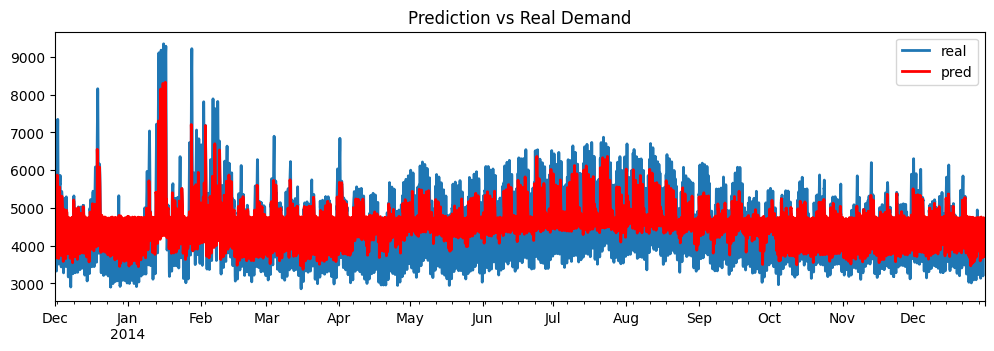

In [144]:
fig, ax = plt.subplots(figsize=(12, 3.5))
data.loc[predictions.index, 'Demand'].plot(ax=ax, linewidth=2, label='real')
predictions.plot(linewidth=2, label='prediction', ax=ax,c='r')
ax.set_title('Prediction vs Real Demand')
ax.legend();